<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/CNN_for_Binary_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing the libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 : Importing the dataset

In [3]:
# Installing the Kaggle API
! pip install -q kaggle

In [4]:
# create a directory as Kaggle
! mkdir -p ~/.kaggle

In [5]:
# Import API key to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
# copy API key to Kaggle directory
! cp kaggle.json ~/.kaggle/

In [7]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [8]:
# list of downloadable datasets
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                  Car Price Dataset                             135KB  2025-01-26 19:53:28          18839        305  1.0              
asinow/diabetes-dataset                                   Diabetes Dataset                              224KB  2025-02-20 08:38:56           1187         27  1.0              
mahmoudelhemaly/students-grading-dataset                  Student Performance & Behavior Dataset        508KB  2025-02-17 17:38:46           2588         45  1.0              
adilshamim8/student-performance-and-learning-style        Student Performance & Learning Style          148KB  2025-02-1

In [9]:
# importing the dataset
! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 93% 203M/218M [00:00<00:00, 264MB/s]
100% 218M/218M [00:00<00:00, 251MB/s]


In [10]:
# unzipping the dataset
!unzip -q /content/cat-and-dog.zip

# Step 2 : Building the Model


In [12]:
# Creating an object (Initializing CNN)
model=tf.keras.models.Sequential()

In [14]:
# Adding first CNN layer (input layer)
# 1) filters = 64
# 2) kernel size =3
# 3) padding = same
# 4) activation function = relu
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size =3, padding = 'same', activation='relu', input_shape = [32, 32, 3])) # reduced size compared to the actual one of the images to improve the processing speed

In [15]:
# Adding maxpool layer
# 1) pool size = 2 --> size of the pixel that are being selected for pooling (selecting units from a 2X2 array)
# 2) strides = 2 --> the units on which the filter is moving
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2, padding='valid'))

In [16]:
# Adding the second CNN layer nad maxpool layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size =3, padding = 'same', activation='relu')) # reduced size compared to the actual one of the images to improve the processing speed
model.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2, padding='valid'))

In [17]:
# Adding the flattening layer
model.add(tf.keras.layers.Flatten())

In [18]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [20]:
# Adding fully connected layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [21]:
# Adding the output layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # for a binary output

In [22]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # loss function will guide the optimizer to find the local minimum

#Step 4 : Fitting CNN to images

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [24]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [25]:
# rescale the images

datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size = (32, 32), classes = ['dogs', 'cats'], class_mode='binary', batch_size=20)
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size = (32, 32), classes = ['dogs', 'cats'], class_mode='binary', batch_size=20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [38]:
len(training_set), len(test_set)

(401, 102)

In [39]:
len(training_set) * 20, len(test_set) * 20  # multiplying by the batch size / minor error in the size of the training/ test sets caused by the imprting of the dataset

(8020, 2040)

In [40]:
test_set.batch_size

20

In [41]:
history = model.fit(training_set, steps_per_epoch = 401, epochs = 20, validation_data = test_set, validation_steps = 102) # steps_per_epoch = len(training_set), validation_steps = len(test_set)
# the model is overfitted --> the model learns too much from the training data (difference between accuracy and val_accuracy), a change in parameters might solve this

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.5499 - loss: 0.6866 - val_accuracy: 0.6357 - val_loss: 0.6289
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6564 - loss: 0.6269 - val_accuracy: 0.6001 - val_loss: 0.6392
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6935 - loss: 0.5821 - val_accuracy: 0.7405 - val_loss: 0.5417
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.7284 - loss: 0.5333 - val_accuracy: 0.7528 - val_loss: 0.5067
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.7623 - loss: 0.4909 - val_accuracy: 0.7627 - val_loss: 0.4982
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.7762 - loss: 0.4619 - val_accuracy: 0.7815 - val_loss: 0.4828
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8064 - loss: 0.4101 - val_accuracy: 0.7672 - val_loss: 0.4957
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8172 - loss: 0.3914 - val_accurac

# Step 5 : Plotting the learning curve


In [45]:
def learning_curve(history, epoch):
  # training versus validation accuracy
  epoch_range = range(1, epoch +1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy ')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()



  # training versus validation loss

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()

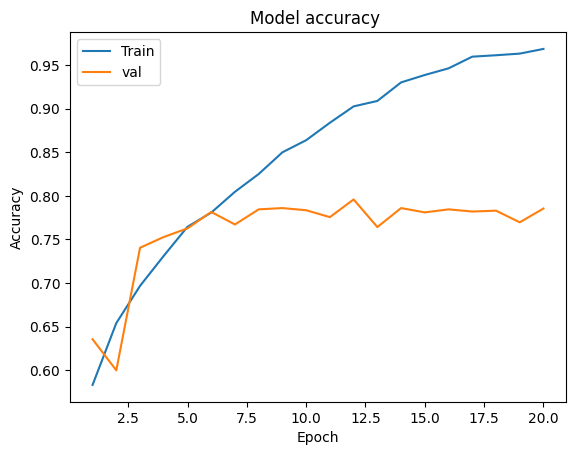

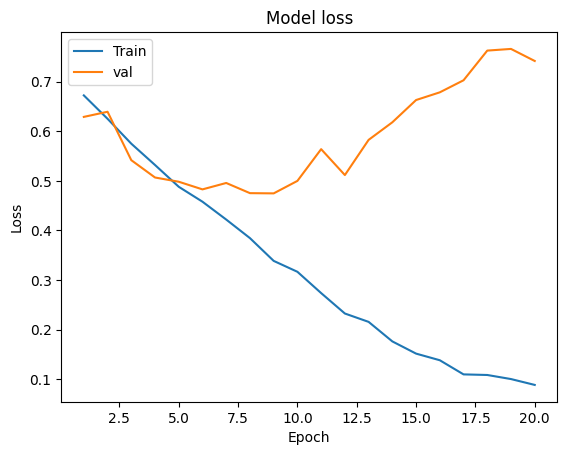

In [46]:
learning_curve(history, 20) # model overfitted after the 5th/11th epoch